Loading required dependancies (pandas and matplotlib)

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

store tha data locally whilst filtering out the irrelivent data

In [94]:
data_frame = pd.read_csv("rb_ranks_1.csv")

# Filter rows where 'cls' is "Ground_vehicles"
fdf = data_frame[(data_frame['cls'] == "Ground_vehicles")]

# Ensure the 'date' column is in datetime format
fdf['date'] = pd.to_datetime(fdf['date'])

# Define the specific start date
start_date = pd.Timestamp('2025-01-01')  # Replace '2025-01-01' with your desired date

# Filter the DataFrame to include only rows since the specific date
fdf = fdf[fdf['date'] >= start_date]


Filtered_df = data_frame[
(data_frame['nation'] == 'USSR') &
(data_frame['rb_lower_br'] == 10.3) &
(data_frame['cls'] == "Ground_vehicles")
]

fdf.describe()

print(len(fdf['rb_lower_br'].unique()))
print(sorted(fdf['rb_lower_br'].unique()))

40
[np.float64(1.0), np.float64(1.3), np.float64(1.7), np.float64(2.0), np.float64(2.3), np.float64(2.7), np.float64(3.0), np.float64(3.3), np.float64(3.7), np.float64(4.0), np.float64(4.3), np.float64(4.7), np.float64(5.0), np.float64(5.3), np.float64(5.7), np.float64(6.0), np.float64(6.3), np.float64(6.7), np.float64(7.0), np.float64(7.3), np.float64(7.7), np.float64(8.0), np.float64(8.3), np.float64(8.7), np.float64(9.0), np.float64(9.3), np.float64(9.7), np.float64(10.0), np.float64(10.3), np.float64(10.7), np.float64(11.0), np.float64(11.3), np.float64(11.7), np.float64(12.0), np.float64(12.3), np.float64(12.7), np.float64(13.0), np.float64(13.3), np.float64(13.7), np.float64(14.0)]


/tmp/ipykernel_47946/329024665.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['date'] = pd.to_datetime(fdf['date'])


first 5 rows of my dataset

In [95]:
Filtered_df.head()

,nation,cls,date,rb_br,rb_lower_br,rb_battles_sum,rb_battles_mean,rb_win_rate,rb_air_frags_per_battle,rb_air_frags_per_death,rb_ground_frags_per_battle,rb_ground_frags_per_death
88228,USSR,Ground_vehicles,2025-03-31,10.3 ~ 11.3,10.3,23182.0,1769.027004,41.498209,0.127437,0.119945,1.376055,1.137025
88268,USSR,Ground_vehicles,2025-03-28,10.3 ~ 11.3,10.3,22477.0,1712.178944,41.869207,0.126135,0.123009,1.391331,1.152199
88308,USSR,Ground_vehicles,2025-03-25,10.3 ~ 11.3,10.3,22491.0,1712.042022,42.177430,0.126688,0.127004,1.395557,1.160527
88348,USSR,Ground_vehicles,2025-03-22,10.3 ~ 11.3,10.3,23099.0,1762.606725,42.585980,0.126446,0.129686,1.393843,1.159565
88388,USSR,Ground_vehicles,2025-03-19,10.3 ~ 11.3,10.3,23970.0,1834.058881,42.956903,0.124774,0.130352,1.395727,1.162029


.info() gives a summary of each collum 

In [96]:
Filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 604 entries, 88228 to 112348
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nation                      604 non-null    object 
 1   cls                         604 non-null    object 
 2   date                        604 non-null    object 
 3   rb_br                       604 non-null    object 
 4   rb_lower_br                 604 non-null    float64
 5   rb_battles_sum              604 non-null    float64
 6   rb_battles_mean             604 non-null    float64
 7   rb_win_rate                 604 non-null    float64
 8   rb_air_frags_per_battle     604 non-null    float64
 9   rb_air_frags_per_death      604 non-null    float64
 10  rb_ground_frags_per_battle  604 non-null    float64
 11  rb_ground_frags_per_death   604 non-null    float64
dtypes: float64(8), object(4)
memory usage: 61.3+ KB


describe() gives basic knowledge for collums 

In [97]:
Filtered_df.describe()

,rb_lower_br,rb_battles_sum,rb_battles_mean,rb_win_rate,rb_air_frags_per_battle,rb_air_frags_per_death,rb_ground_frags_per_battle,rb_ground_frags_per_death
count,6.040000e+02,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,1.030000e+01,48905.013245,9781.239887,57.065304,0.133996,0.153172,1.485672,1.431052
std,1.777829e-15,18359.768264,5464.155042,8.239154,0.050225,0.059128,0.126201,0.136023
min,1.030000e+01,10229.000000,1705.519082,35.810986,0.016610,0.017036,1.163887,1.103486
25%,1.030000e+01,36239.000000,4653.007171,51.588557,0.108356,0.118620,1.390779,1.358274
50%,1.030000e+01,49397.000000,9617.492240,58.207265,0.140911,0.168348,1.473862,1.456114
75%,1.030000e+01,59269.500000,13643.228117,64.252208,0.167234,0.196558,1.586778,1.525720
max,1.030000e+01,104826.000000,22619.022242,72.909786,0.294670,0.290464,1.749421,1.740431


plots chosen information from dataset on a generated graph

<Axes: >

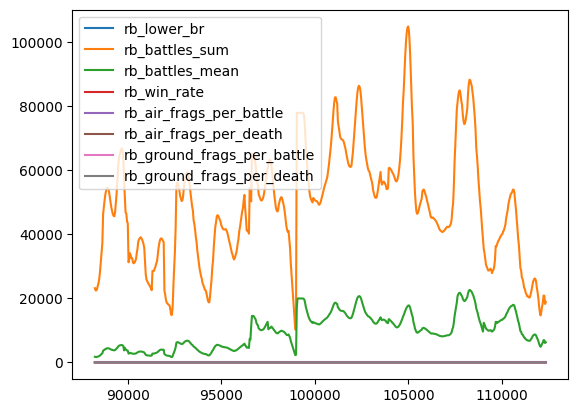

In [98]:
Filtered_df.plot()

from the start of the dataset, grabs the first and last date. then gets every month inbetween there into a value.

In [99]:
## Ensure the 'date' column is in datetime format
#Filtered_df['date'] = pd.to_datetime(Filtered_df['date'])
#
## Define the specific start date
#start_date = pd.Timestamp('2020-01-01')
#Filtered_df = Filtered_df[Filtered_df['date'] >= start_date]
#
## Plot the graph using the 'date' column
#plt.figure(figsize=(12, 6))
#plt.scatter(Filtered_df['date'], Filtered_df['rb_win_rate'])
#plt.title("Scatter of Date against Win Rate")
#plt.ylabel('Win Rate')
#plt.xlabel('Date')
#
## Set x-axis to show each month
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to months
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format ticks as 'YYYY-MM'
#plt.xticks(rotation=45)
#
## Automatically adjust the layout
#plt.tight_layout()
#plt.show()

graph based on the date value, showing the winrate each month.

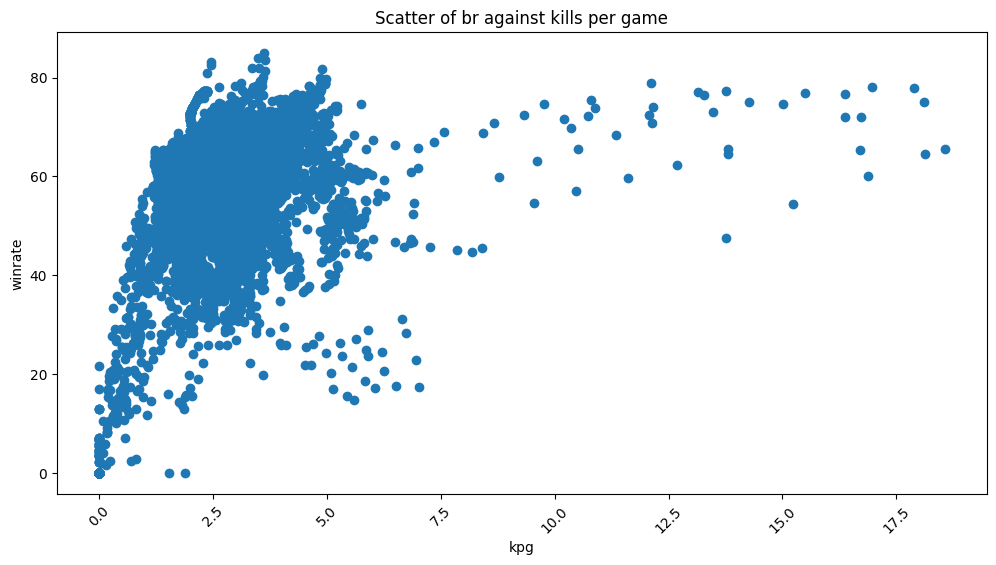

In [100]:

plt.figure(figsize=(12, 6))
plt.scatter(fdf['rb_ground_frags_per_battle'], fdf['rb_win_rate'])
plt.title("Scatter of br against kills per game")
plt.xlabel('kpg')
plt.ylabel('winrate')
plt.xticks(rotation=45)
plt.show()




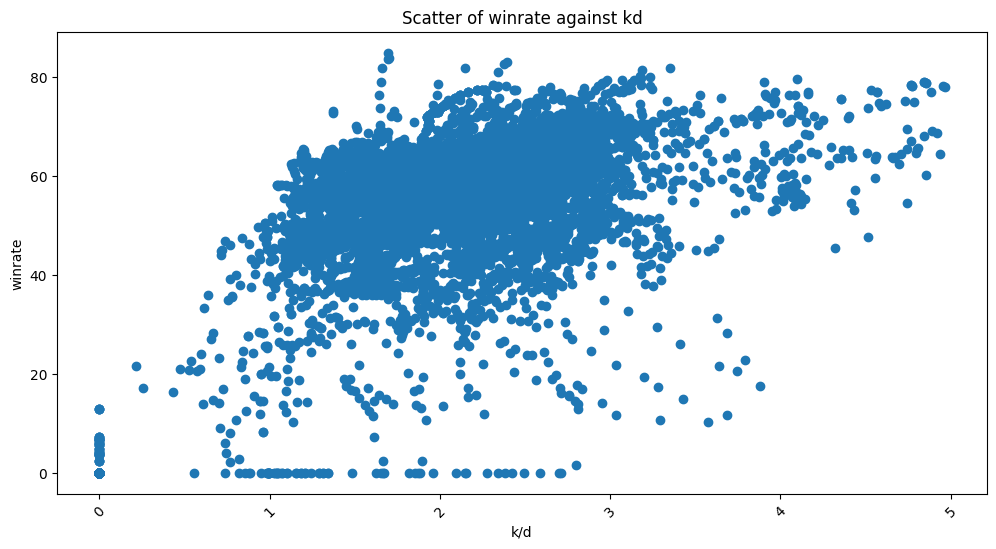

In [101]:

plt.figure(figsize=(12, 6))
plt.scatter(fdf['rb_ground_frags_per_death'], fdf['rb_win_rate'])
plt.title("Scatter of winrate against kd")
plt.xlabel('k/d')
plt.ylabel('winrate')
plt.xticks(rotation=45)
plt.show()

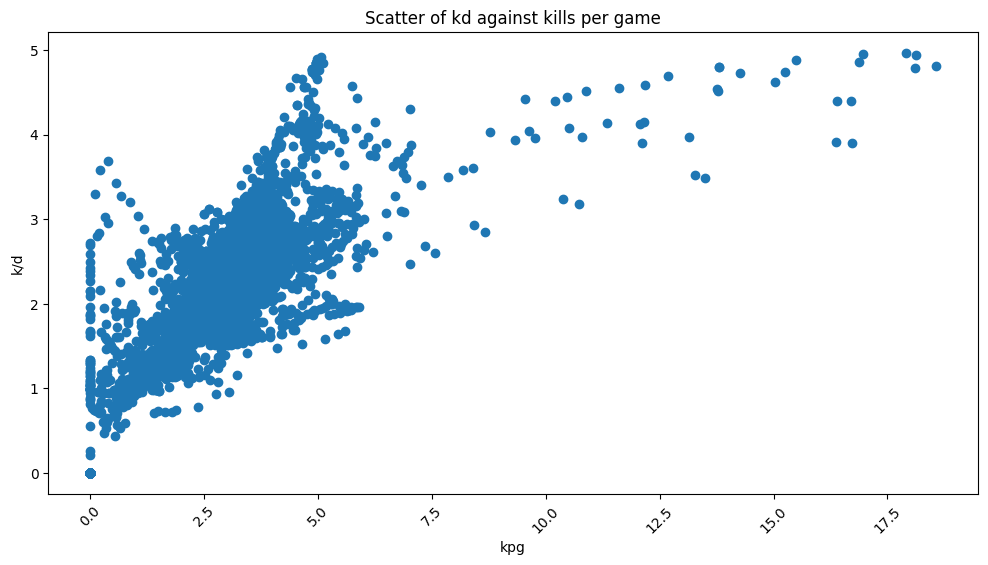

In [102]:
plt.figure(figsize=(12, 6))
plt.scatter(fdf['rb_ground_frags_per_battle'], fdf['rb_ground_frags_per_death'])
plt.title("Scatter of kd against kills per game")
plt.xlabel('kpg')
plt.ylabel('k/d')
plt.xticks(rotation=45)
plt.show()


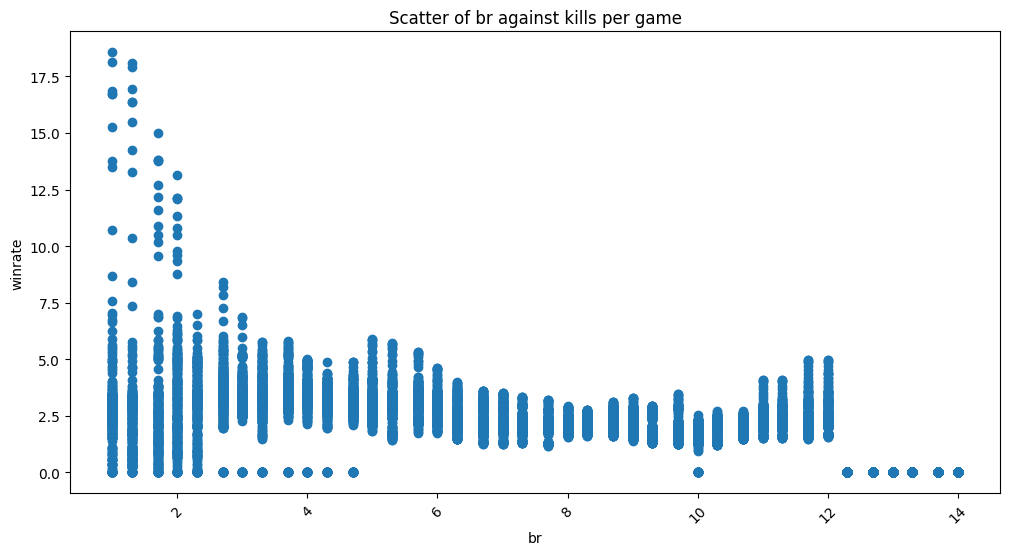

In [103]:
plt.figure(figsize=(12, 6))
plt.scatter(fdf['rb_lower_br'], fdf['rb_ground_frags_per_battle'])
plt.title("Scatter of br against kills per game")
plt.xlabel('br')
plt.ylabel('winrate')
plt.xticks(rotation=45)
plt.show()